# Assignment 2

Akos Engelmann, Simon Jasansky

In [197]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import color

In [198]:
# we don't need to load the y_train and y_test, as we will not use the labels of the image
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

In [199]:
# split the test data into test and validation
data = np.concatenate((x_train, x_test))
print(data.shape)
# the shape is as expected, 60000 samples with 32x32 pictures, with 3 layers (RGB)

(60000, 32, 32, 3)


(32, 32, 3)
(32, 3)
(3,)
[59 62 63]


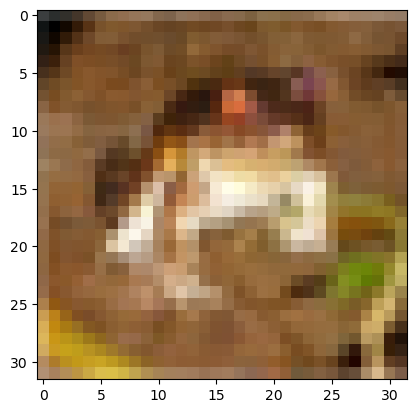

In [200]:
# first picture
print(data[0].shape)

# first row (or column, idk) of pixels of the picture
print(data[0][0].shape)

# first pixel of the first row/column of the picture (RGB values)
print(data[0][0][0].shape)
print(data[0][0][0])

# print the first picture
plt.imshow(data[0])
plt.show()

In [201]:
# reshuffle before splitting data
np.random.shuffle(data)

ptrain = data[:48000]
ptest = data[48000:54000]
pvalid = data[54000:]

# do normalization over each image (use L2 norm)
data = data.astype("float32")
data = data/255

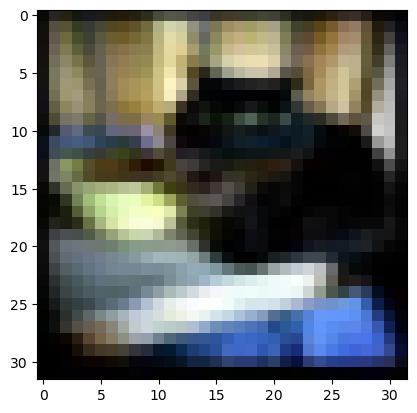

In [202]:
# print the first picture again (normalized)
plt.imshow(data[0])
plt.show()

(60000, 32, 32)


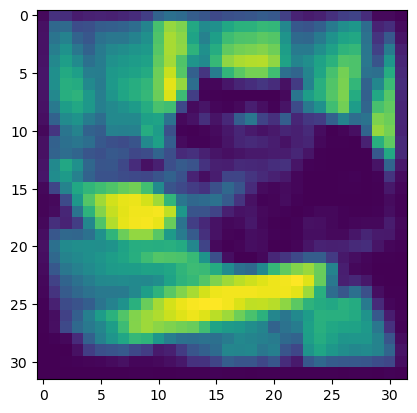

(48000, 32, 32, 2)
(6000, 32, 32, 2)
(6000, 32, 32, 2)
(48000, 32, 32)
(6000, 32, 32)
(6000, 32, 32)


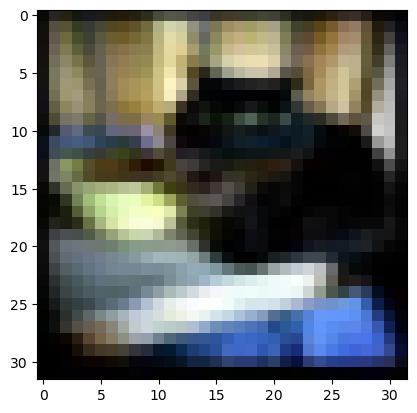

[[[ 0.00108505 -0.00295411]
  [ 0.01871376  0.01859057]
  [-0.0200409   0.07984704]
  ...
  [ 0.00886782  0.01648369]
  [ 0.01064735 -0.00997877]
  [ 0.00434474 -0.01182496]]

 [[ 0.00163552  0.01268738]
  [ 0.00835152  0.06498164]
  [-0.04171615  0.15229401]
  ...
  [ 0.00994484  0.06765984]
  [ 0.01477066 -0.00653416]
  [ 0.00447058 -0.01860855]]

 [[ 0.01223764  0.01259223]
  [ 0.01064257  0.07948102]
  [-0.04351465  0.18316409]
  ...
  [-0.00491901  0.11037155]
  [ 0.00823347  0.00830786]
  [ 0.01472747 -0.04003304]]

 ...

 [[ 0.00325881 -0.00886929]
  [ 0.00312924 -0.00223662]
  [ 0.00817189  0.00287932]
  ...
  [ 0.17512241 -0.4456709 ]
  [ 0.13462873 -0.3379057 ]
  [ 0.0890001  -0.19143572]]

 [[ 0.00108627 -0.00295644]
  [ 0.          0.        ]
  [ 0.00408583  0.00143992]
  ...
  [ 0.11683884 -0.27636167]
  [ 0.07326633 -0.19201632]
  [ 0.02617831 -0.07682447]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.00421557 -0.00519305]
  ...
  [ 0.0152007  -0.035090

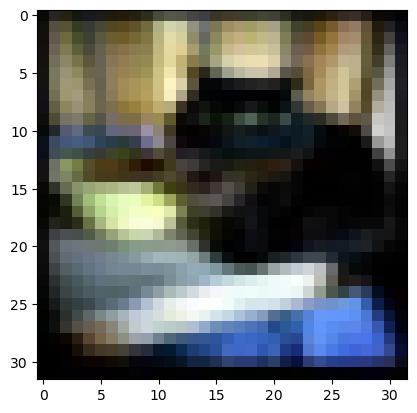

[[[0.03529412 0.03529412 0.03921569]
  [0.16078432 0.13725491 0.12941177]
  [0.13725491 0.13333334 0.07450981]
  ...
  [0.05490196 0.03137255 0.01568628]
  [0.04313726 0.03137255 0.04705882]
  [0.01176471 0.01176471 0.02745098]]

 [[0.06666667 0.05882353 0.04705882]
  [0.3372549  0.30588236 0.25882354]
  [0.32941177 0.3254902  0.19607843]
  ...
  [0.12941177 0.10196079 0.05490196]
  [0.14117648 0.12941177 0.13725491]
  [0.03921569 0.04313726 0.0627451 ]]

 [[0.07843138 0.05882353 0.05098039]
  [0.3882353  0.34901962 0.2901961 ]
  [0.42745098 0.41568628 0.25490198]
  ...
  [0.16862746 0.14509805 0.06666667]
  [0.26666668 0.25490198 0.2509804 ]
  [0.06666667 0.06666667 0.09803922]]

 ...

 [[0.         0.         0.01176471]
  [0.00392157 0.         0.00392157]
  [0.01568628 0.         0.        ]
  ...
  [0.2627451  0.38431373 0.7882353 ]
  [0.20392157 0.2784314  0.5686275 ]
  [0.03137255 0.05098039 0.19607843]]

 [[0.         0.         0.00392157]
  [0.         0.         0.        ]


In [204]:
# chromacity channels (a, b in Lab, or H, S is HSV)

grey_input = list()
chrominance_output = list()

for pic in data:
    lab = color.rgb2lab(pic)
    grey_input.append(lab[:,:,0])
    chrominance_output.append(lab[:,:,1:] / 128)
    
grey_input = np.array(grey_input)
chrominance_output = np.array(chrominance_output)
print(grey_input.shape)
plt.imshow(grey_input[0])
plt.show()

# split into train, test and validation sets
ctrain = chrominance_output[:48000]
ctest = chrominance_output[48000:54000]
cvalid = chrominance_output[54000:]

gtrain = grey_input[:48000]
gtest = grey_input[48000:54000]
gvalid = grey_input[54000:]

train = data[:48000]
test = data[48000:54000]
valid = data[54000:]

print(ctrain.shape)
print(ctest.shape)
print(cvalid.shape)

print(gtrain.shape)
print(gtest.shape)
print(gvalid.shape)

plt.imshow(data[0])
plt.show()

print(ctrain[0])

plt.imshow(ptrain[0])
plt.show()

print(data[0])
print(ptrain[0])


In [238]:
# implement CAE
input_layer = tf.keras.layers.Input(shape=(32, 32, 1), name="INPUT")
# shape now: 32x32x3

x = tf.keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), strides = 1, activation='relu', padding='same')(input_layer)
# shape now: 32x32x8

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, activation='relu', padding='same')(x)

x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
#shape now: 16x16x8 - since we use 1x1 strides, it's gonna subtract only 1 each dimensions

x = tf.keras.layers.Conv2D(filters = 12, kernel_size = (3, 3), strides = 1, activation='relu', padding='same')(x)
#shape now: 

x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
#shape now: 

# Latent space is a Conv2D layer, after the MaxPooling and before the UpSampling
latent_space_rep = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), strides = 1, activation='relu', padding='same', name = "LATENT_SPACE")(x)

x = tf.keras.layers.UpSampling2D((2, 2))(latent_space_rep)
# shape now: 

x = tf.keras.layers.Conv2DTranspose(12, (3, 3), activation='relu', padding='same')(x)
# shape now: 

x = tf.keras.layers.UpSampling2D((2, 2))(x)
# shape now: 

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, activation='relu', padding='same')(x)

output_layer = tf.keras.layers.Conv2D(2, (3, 3), padding='same', activation='tanh', name="OUTPUT")(x)
# shape now: 32x32x3

In [239]:
pic_CAE = tf.keras.models.Model(input_layer, output_layer)
pic_CAE.compile(optimizer='adam', loss='mse')
pic_CAE.summary()

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_250 (Conv2D)         (None, 32, 32, 8)         80        
                                                                 
 conv2d_251 (Conv2D)         (None, 32, 32, 64)        4672      
                                                                 
 conv2d_252 (Conv2D)         (None, 32, 32, 128)       73856     
                                                                 
 conv2d_253 (Conv2D)         (None, 32, 32, 128)       147584    
                                                                 
 conv2d_254 (Conv2D)         (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 16, 16, 64)       0  

In [242]:
# train the model
pic_CAE.fit(x = gtrain,
           y = ctrain,
           epochs=10,
           batch_size=128,
           shuffle=True,
           validation_data=(gtest, ctest))

Epoch 1/10


2022-11-15 08:31:25.395558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 129s 338ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 2/10
375/375 [==============================] - 125s 333ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 3/10
375/375 [==============================] - 125s 334ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 4/10
375/375 [==============================] - 125s 334ms/step - loss: 0.0088 - val_loss: 0.0091
Epoch 5/10
375/375 [==============================] - 125s 334ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 6/10
375/375 [==============================] - 125s 334ms/step - loss: 0.0086 - val_loss: 0.0090
Epoch 7/10
375/375 [==============================] - 125s 333ms/step - loss: 0.0085 - val_loss: 0.0090
Epoch 8/10
375/375 [==============================] - 126s 335ms/step - loss: 0.0084 - val_loss: 0.0090
Epoch 9/10
375/375 [==============================] - 125s 333ms/step - loss: 0.0083 - val_loss: 0.0091
Epoch 10/10
375/375 [==============================] - 120s 320ms/step - lo

In [11]:
pic_CAE.save("pic_cae_grey.h5")

In [13]:
# make model to get intermediate representation in latent space
get_encoded_pic_grey = tf.keras.models.Model(inputs=pic_CAE.input, outputs=pic_CAE.get_layer("LATENT_SPACE").output)

In [14]:
# get the intermediate pictures
encoded_pic = get_encoded_pic_grey.predict(gtest)
encoded_pic = encoded_pic.reshape((len(gtest), 8*8*16))
encoded_pic.shape

120/188 [==================>...........] - ETA: 0s

2022-11-14 15:09:21.926923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 0s 1ms/step


(6000, 1024)

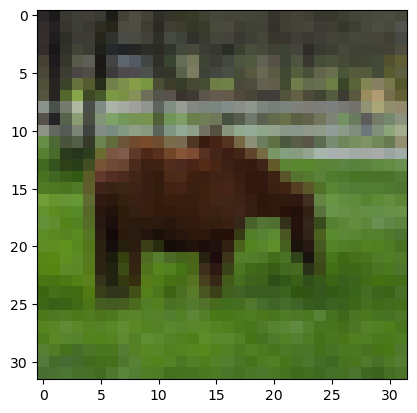

In [213]:
index = 100

plt.imshow(test[index])
plt.show()

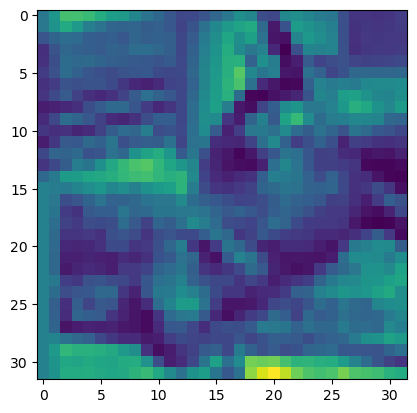

In [143]:
plt.imshow(gtest[index])
plt.show()

188/188 [==============================] - 6s 30ms/step


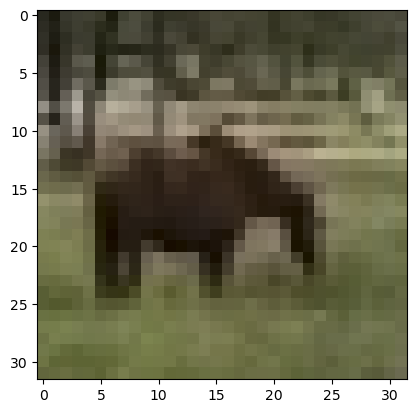

In [243]:
# get the reconstructed pics and visualize them
pics_chrominance = pic_CAE.predict(gtest)
pics_chrominance *= 128
#print(pics_chrominance[index])
result = np.zeros((32,32,3))
result[:,:,0] = gtest[index]
result[:,:,1:] = pics_chrominance[index]
pic = (color.lab2rgb(result)*256).round().astype(int)
pic_norm = color.lab2rgb(result)
#print(pic)
#print(ptest[index])
plt.imshow(pic_norm)
plt.show()

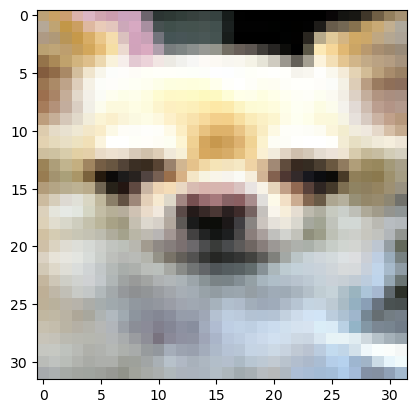

In [211]:
plt.imshow(ptest[index])
plt.show()